In [1]:
#Load the libraries
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #matplotlib for plotting

In [2]:
# Importing the data
data = pd.read_csv("loan.csv")
data.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
# Checking type of columns, shape, missing value etc.
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [4]:
# Checking shape of data before manipulation
data.shape

(39717, 111)

In [5]:
# Some columns seems to have all NA values
data.columns[data.isna().all()]

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [6]:
# Columns with all NA values cannot possibly contribute in any way in analysis, hence dropping them
data = data.dropna(axis=1, how="all")

In [7]:
# Shape of data after dropping columns with all NA
data.shape

(39717, 57)

In [8]:
# Still a lot of columns, how to find which columns are best suited for analysis
print(data.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [9]:
# Some columns seem to have all zeros, find list of columns with mean 0
lst = data.mean() > 0
lst

C:\Users\user\AppData\Local\Temp/ipykernel_4520/4245716655.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  lst = data.mean() > 0


id                             True
member_id                      True
loan_amnt                      True
funded_amnt                    True
funded_amnt_inv                True
installment                    True
annual_inc                     True
dti                            True
delinq_2yrs                    True
inq_last_6mths                 True
mths_since_last_delinq         True
mths_since_last_record         True
open_acc                       True
pub_rec                        True
revol_bal                      True
total_acc                      True
out_prncp                      True
out_prncp_inv                  True
total_pymnt                    True
total_pymnt_inv                True
total_rec_prncp                True
total_rec_int                  True
total_rec_late_fee             True
recoveries                     True
collection_recovery_fee        True
last_pymnt_amnt                True
collections_12_mths_ex_med    False
policy_code                 

In [10]:
#drop columns with mean 0
data.drop(labels=lst[lst==False].index.tolist(), inplace=True, axis=1)

In [11]:
#Dropping url column, not needed for EDA, Loan id is available in separate column
data.drop(labels=["url"], inplace=True, axis=1)
data.shape

(39717, 51)

In [12]:
# Checking columns after removing all NA and 0 columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
# Cheking loan_status column
data.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [23]:
# loan_status : Charged Off - Defaulter, Fully Paid/Current - Not Defaulter
data_chargedoff = data[(data.loan_status=="Charged Off")]
data_fullypaid = data[(data.loan_status=="Fully Paid")]
print(data_chargedoff.shape)
print(data_fullypaid.shape)

(5627, 51)
(32950, 51)


In [29]:
data_CF = data[~(data.loan_status=="Current")]
data_CF.shape

(38577, 51)

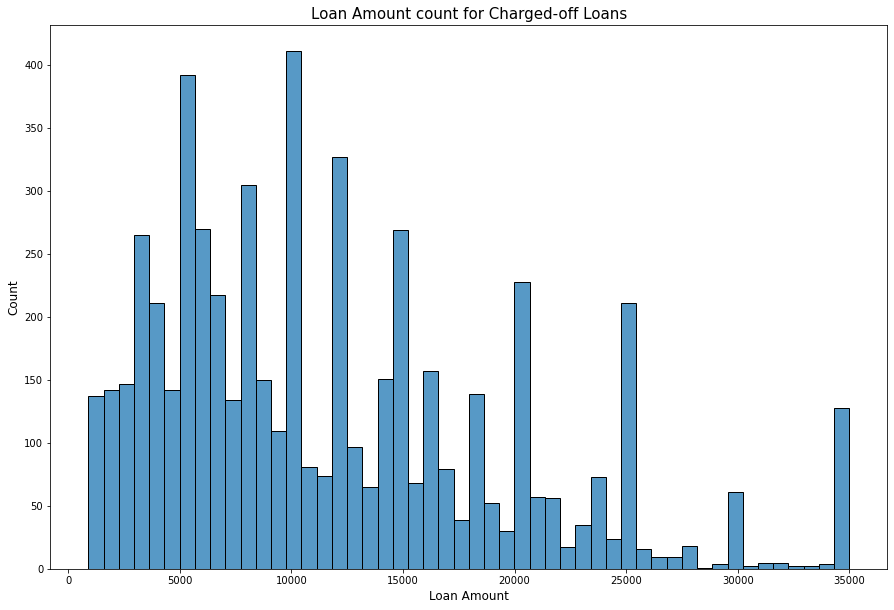

In [25]:
# univariate analysis on loan amount for Charged-off loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_chargedoff.funded_amnt, bins=50)
g.set_title("Loan Amount count for Charged-off Loans", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Loan Amount", fontsize=12)
plt.show()

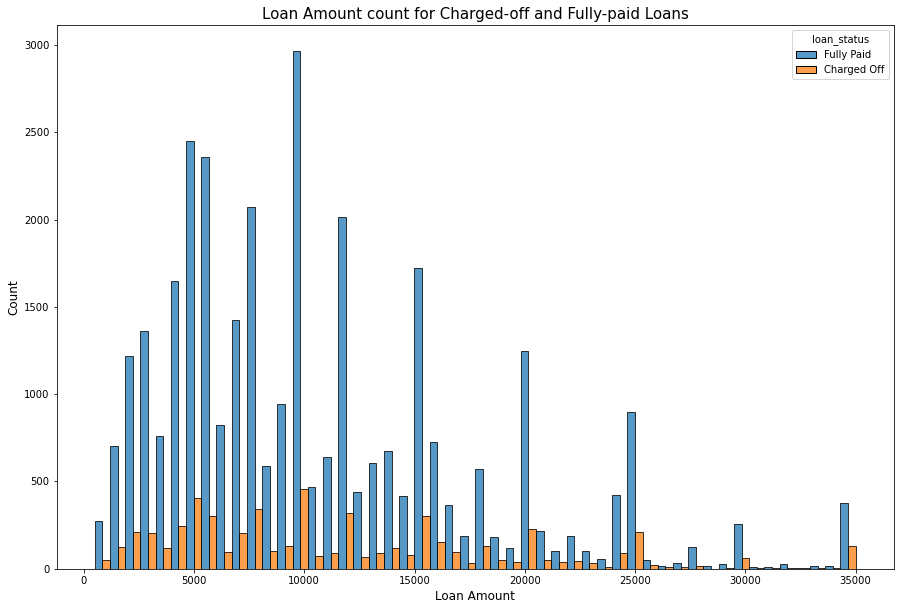

In [36]:
# Charged-off loans have spike at every 5000 of funded amount starting from 5000
# Let's compare the funded amount counts of charged-off and Fully paid loans
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="funded_amnt", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Loan Amount count for Charged-off and Fully-paid Loans", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Loan Amount", fontsize=12)
plt.show()

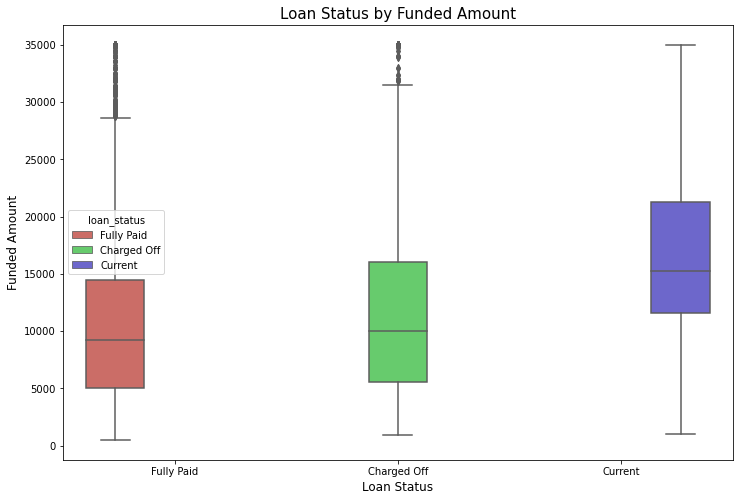

In [41]:
# Segmented-bivariate analysis on loan amount
fig, ax = plt.subplots(figsize=(12,8))
g2 = sns.boxplot(x="loan_status", y="funded_amnt",data=data, 
              palette="hls", hue="loan_status")
g2.set_title("Loan Status by Funded Amount", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Loan Status", fontsize=12)
plt.show()

# We are going to evaluate credit risk based on three factors - Character, Capacity and Conditions
1. Character - Can be observed from Number of jobs held, length of employments, homeownership 
2. Capacity - DTI 
3. Conditions - Interest rate, term length, installment, Reason for loan

In [37]:
data_CF.home_ownership.value_counts()

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

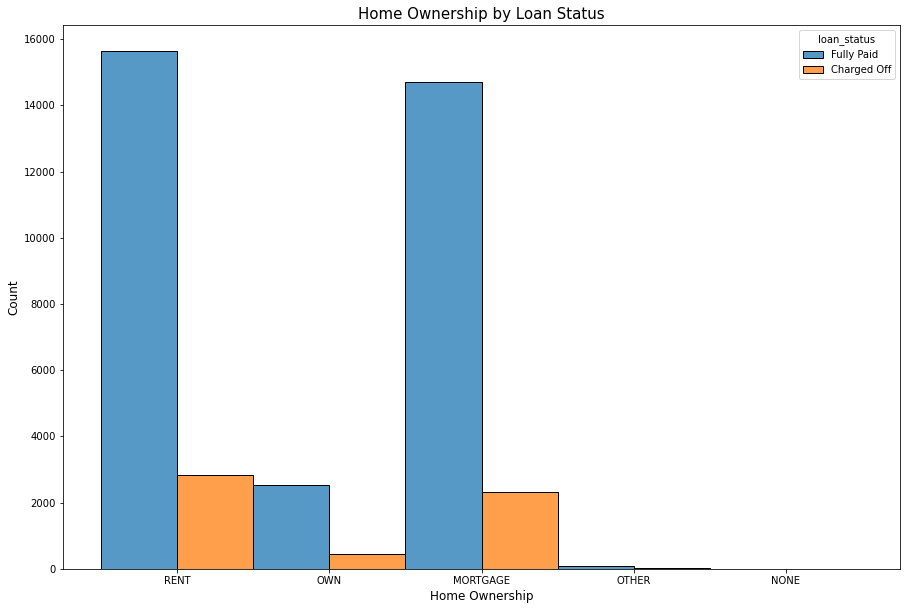

In [38]:
# Checking categorical variable home_ownership for charged-off and Fully-paid
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="home_ownership", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Home Ownership by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Home Ownership", fontsize=12)
plt.show()

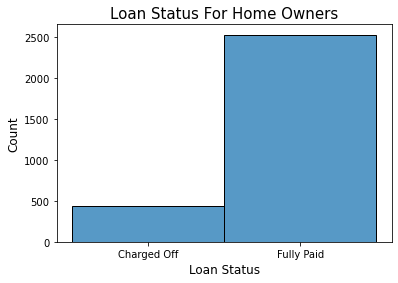

In [44]:
data_CF_OwnHome = data_CF[data_CF.home_ownership=="OWN"]
g = sns.histplot(data=data_CF_OwnHome, x="loan_status", bins=50)
g.set_title("Loan Status For Home Owners", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Loan Status", fontsize=12)
plt.show()

# Aside from Other and None, lowest number of defaulters have own home

In [52]:
## Checking Employment length column
data_CF.emp_length.dtype

dtype('O')

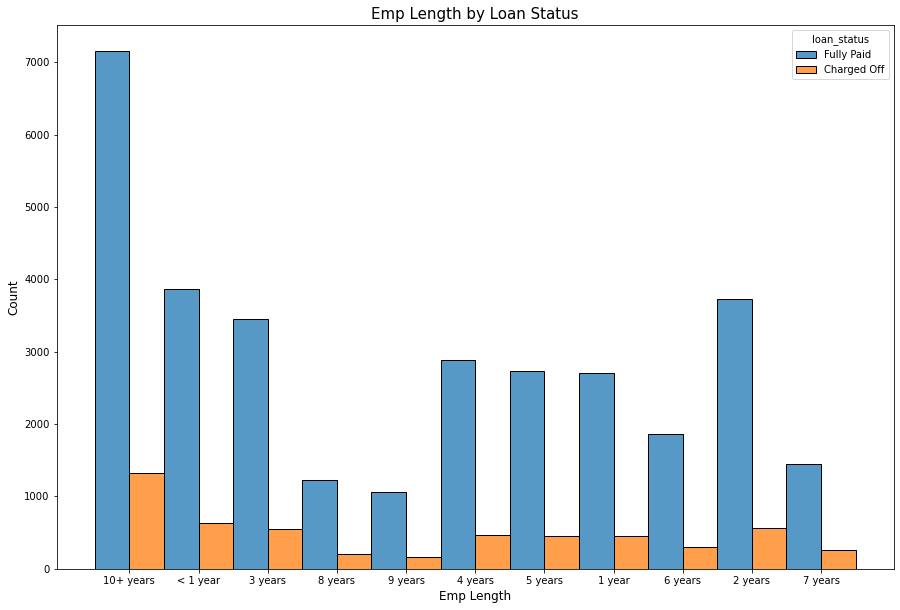

In [47]:
fig, ax = plt.subplots(figsize=(15,10))
g = sns.histplot(data=data_CF, x="emp_length", bins=50, hue="loan_status", multiple="dodge")
g.set_title("Emp Length by Loan Status", fontsize=15)
g.set_ylabel("Count", fontsize=12)
g.set_xlabel("Emp Length", fontsize=12)
plt.show()

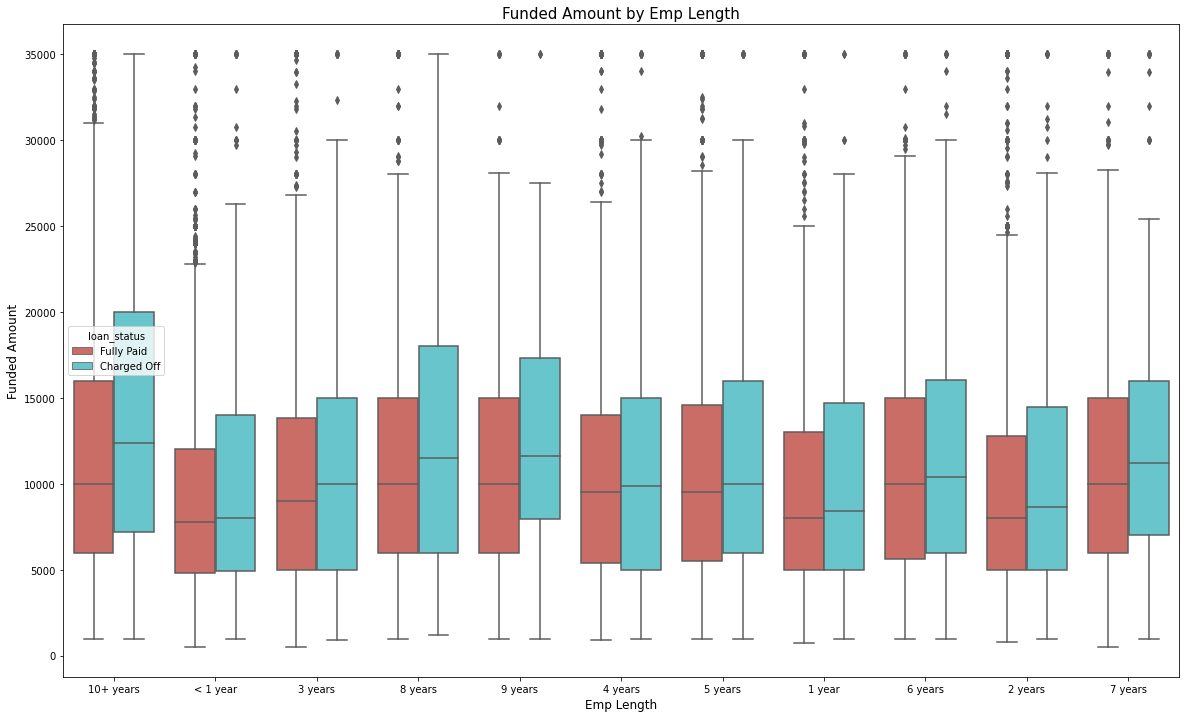

In [49]:
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.boxplot(x="emp_length", y="funded_amnt",data=data_CF, 
              palette="hls", hue="loan_status")
g2.set_title("Funded Amount by Emp Length", fontsize=15)
g2.set_ylabel("Funded Amount", fontsize=12)
g2.set_xlabel("Emp Length", fontsize=12)
plt.show()

# Median and 75th Percentile of Funded amount for Charged-off loans with 10+ years of employment is significantly higher
# For Loan Amount > 15000, more analysis needed for evaluating credit risk

In [56]:
data_CF.emp_length = data_CF.emp_length.apply(lambda x: str(x).split(" ")[0])
data_CF.emp_length = data_CF.emp_length.apply(lambda x: "0" if x=="<" else x)
data_CF.emp_length = data_CF.emp_length.apply(lambda x: x[0:2] if x=="10+" else x)

10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
nan    1033
Name: emp_length, dtype: int64

In [58]:
data_CF.emp_length = data_CF.emp_length.apply(lambda x: None if x=="nan" else x)
data_CF.emp_length.value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


10    8488
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [60]:
## Replacing None with 100, will not consider them in analysis
data_CF.emp_length = data_CF.emp_length.apply(lambda x: 100 if x==None else x)
data_CF.emp_length.value_counts()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
100    1033
Name: emp_length, dtype: int64

In [61]:
data_CF.emp_length = data_CF.emp_length.astype("int")
data_CF.emp_length.value_counts()

10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
100    1033
Name: emp_length, dtype: int64

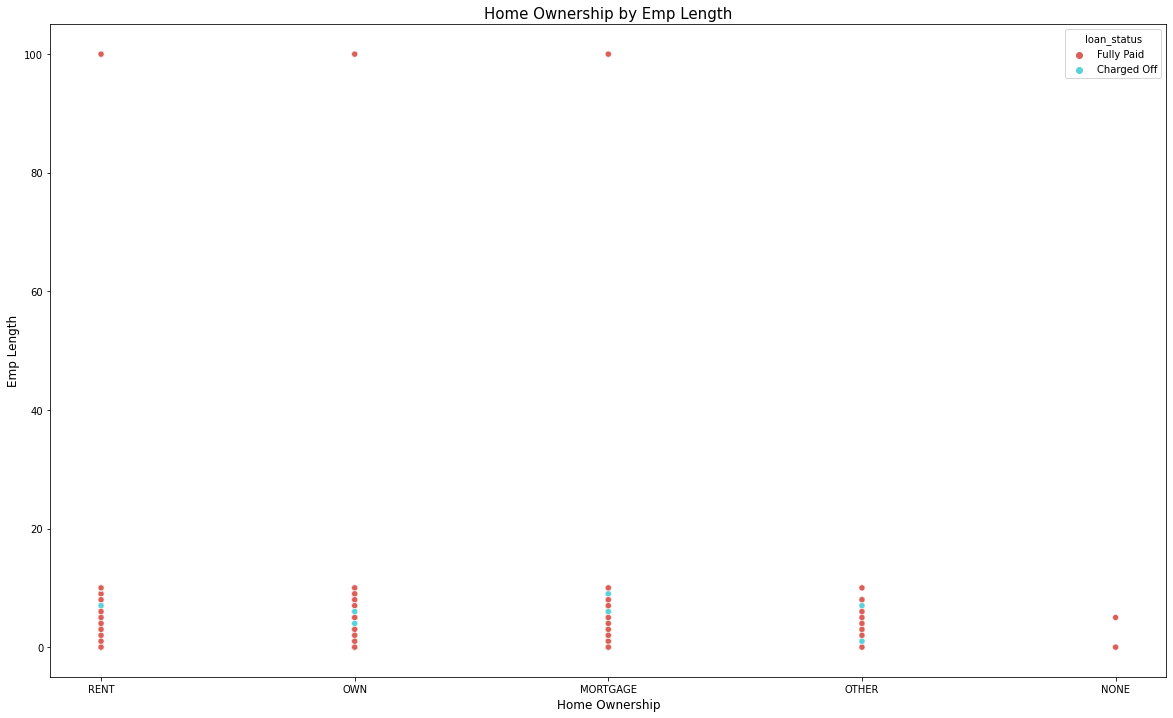

In [64]:
fig, ax = plt.subplots(figsize=(20,12))
g2 = sns.scatterplot(y="emp_length", x="home_ownership",data=data_CF, 
              palette="hls", hue="loan_status")
g2.set_title("Home Ownership by Emp Length", fontsize=15)
g2.set_xlabel("Home Ownership", fontsize=12)
g2.set_ylabel("Emp Length", fontsize=12)
plt.show()